In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
import kagglehub
ankushpanday1_thyroid_cancer_risk_prediction_dataset_path = kagglehub.dataset_download('ankushpanday1/thyroid-cancer-risk-prediction-dataset')

print('Data source import complete.')


100%|██████████| 3.70M/3.70M [00:00<00:00, 59.3MB/s]

Extracting files...


Data source import complete.


In [ ]:
#@title importing
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, recall_score, precision_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier



In [ ]:
#@title function evaluate_model
res = {}
def evaluate_model(model,y_test, y_pre):
    """
    to evaluate the model

    """
    results = {}

    accuracy = accuracy_score(y_test, y_pre)
    results['accuracy'] = accuracy

    f1 = f1_score(y_test, y_pre, average='weighted')
    results['f1_score'] = f1

    recall = recall_score(y_test, y_pre, average='weighted')
    results['recall'] = recall

    precision = precision_score(y_test, y_pre, average='weighted')
    results['precision'] = precision
    res[model] = results
    return results

In [ ]:
#@title import dataset and save it in df
#https://www.kaggle.com/datasets/ankushpanday1/thyroid-cancer-risk-prediction-dataset
import kagglehub
import pandas as pd

# Download latest version
path = kagglehub.dataset_download("ankushpanday1/thyroid-cancer-risk-prediction-dataset")
df=pd.read_csv(path+'/thyroid_cancer_risk_data.csv')


In [ ]:
df.head()

,Patient_ID,Age,Gender,Country,Ethnicity,Family_History,Radiation_Exposure,Iodine_Deficiency,Smoking,Obesity,Diabetes,TSH_Level,T3_Level,T4_Level,Nodule_Size,Thyroid_Cancer_Risk,Diagnosis
0,1,66,Male,Russia,Caucasian,No,Yes,No,No,No,No,9.37,1.67,6.16,1.08,Low,Benign
1,2,29,Male,Germany,Hispanic,No,Yes,No,No,No,No,1.83,1.73,10.54,4.05,Low,Benign
2,3,86,Male,Nigeria,Caucasian,No,No,No,No,No,No,6.26,2.59,10.57,4.61,Low,Benign
3,4,75,Female,India,Asian,No,No,No,No,No,No,4.10,2.62,11.04,2.46,Medium,Benign
4,5,35,Female,Germany,African,Yes,Yes,No,No,No,No,9.10,2.11,10.71,2.11,High,Benign


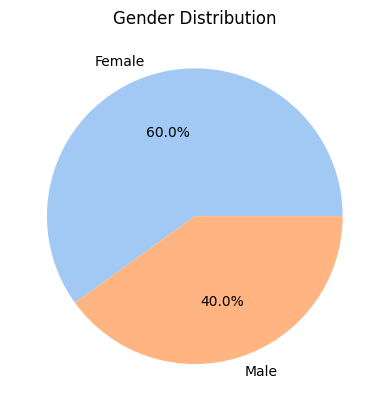

In [ ]:
#@title Gender
df.groupby('Gender').size().plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.gca().spines[['top', 'right', 'bottom', 'left']].set_visible(False)
plt.ylabel('') #Remove y-label
plt.title('Gender Distribution')
plt.show()

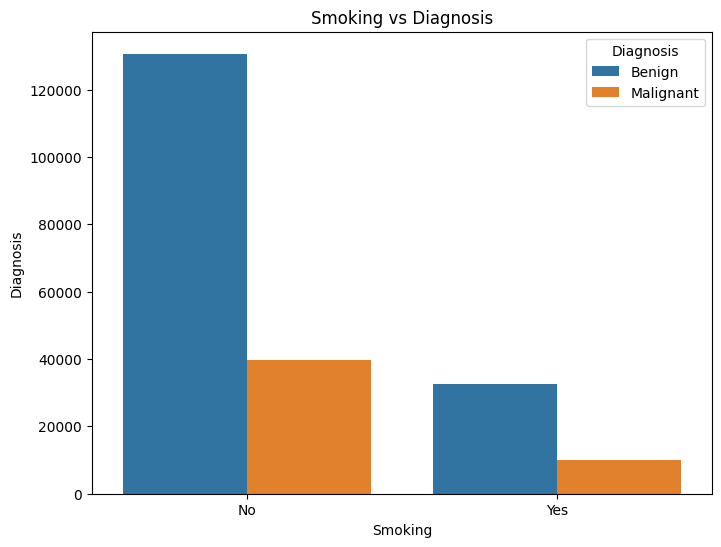

In [ ]:
#@title Smoking vs Diagnosis
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Smoking', hue='Diagnosis')
plt.xlabel('Smoking')
plt.ylabel('Diagnosis')
plt.title('Smoking vs Diagnosis')
plt.show()

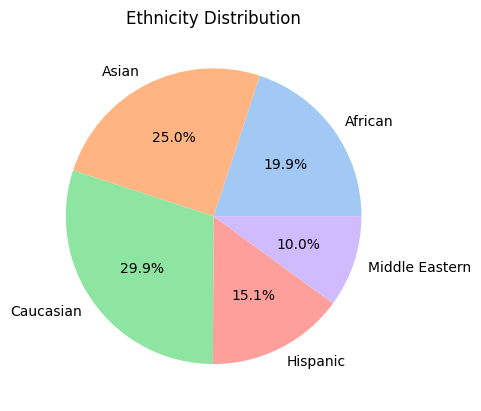

In [ ]:
#@title Ethnicity
df.groupby('Ethnicity').size().plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.gca().spines[['top', 'right', 'bottom', 'left']].set_visible(False)
plt.ylabel('') #Remove y-label
plt.title('Ethnicity Distribution')
plt.show()

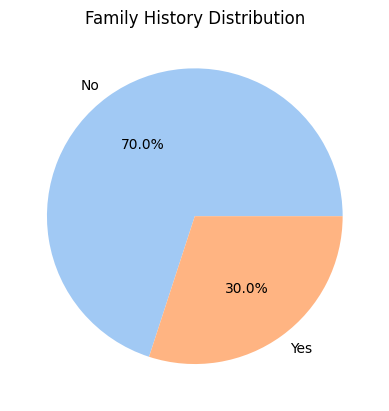

In [ ]:
#@title Family_History
df.groupby('Family_History').size().plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.gca().spines[['top', 'right', 'bottom', 'left']].set_visible(False)
plt.ylabel('') #Remove y-label
plt.title('Family History Distribution')
plt.show()

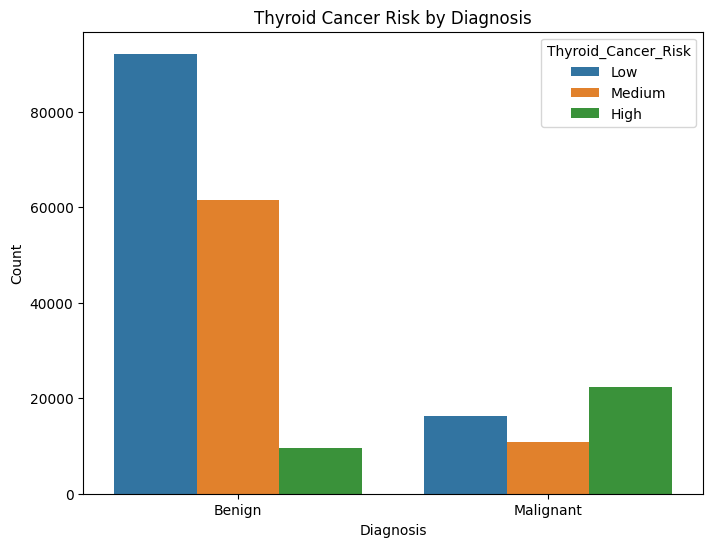

In [ ]:
#@title Thyroid Cancer Risk by Diagnosis
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Diagnosis', hue='Thyroid_Cancer_Risk')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.title('Thyroid Cancer Risk by Diagnosis')
plt.show()

In [ ]:
#@title Thyroid Cancer Risk by Country
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Country', hue='Thyroid_Cancer_Risk', palette='Set2')
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Thyroid Cancer Risk by Country')
plt.show()


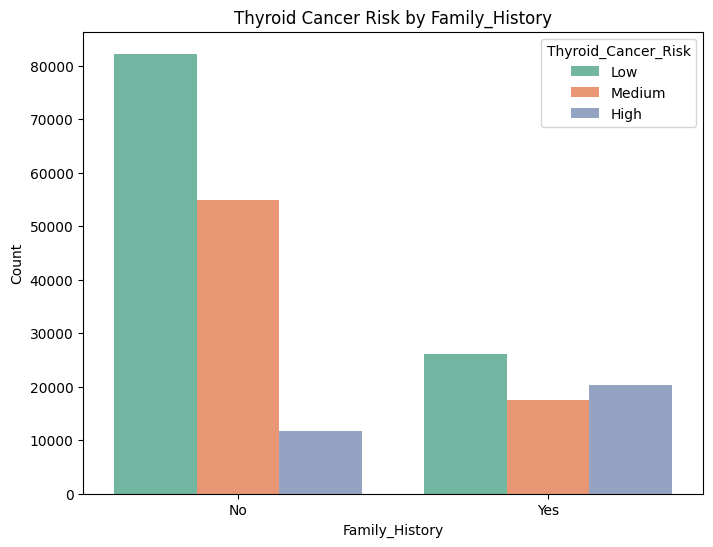

In [ ]:
#@title Thyroid Cancer Risk by Family_History
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Family_History', hue='Thyroid_Cancer_Risk', palette='Set2')
plt.xlabel('Family_History')
plt.ylabel('Count')
plt.title('Thyroid Cancer Risk by Family_History')
plt.show()

# Clean Data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212691 entries, 0 to 212690
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Patient_ID           212691 non-null  int64  
 1   Age                  212691 non-null  int64  
 2   Gender               212691 non-null  object 
 3   Country              212691 non-null  object 
 4   Ethnicity            212691 non-null  object 
 5   Family_History       212691 non-null  object 
 6   Radiation_Exposure   212691 non-null  object 
 7   Iodine_Deficiency    212691 non-null  object 
 8   Smoking              212691 non-null  object 
 9   Obesity              212691 non-null  object 
 10  Diabetes             212691 non-null  object 
 11  TSH_Level            212691 non-null  float64
 12  T3_Level             212691 non-null  float64
 13  T4_Level             212691 non-null  float64
 14  Nodule_Size          212691 non-null  float64
 15  Thyroid_Cancer_Ri

In [ ]:
df.describe()

,Patient_ID,Age,TSH_Level,T3_Level,T4_Level,Nodule_Size
count,212691.00000,212691.000000,212691.000000,212691.000000,212691.000000,212691.000000
mean,106346.00000,51.918497,5.045102,2.001727,8.246204,2.503403
std,61398.74739,21.632815,2.860264,0.866248,2.164188,1.444631
min,1.00000,15.000000,0.100000,0.500000,4.500000,0.000000
25%,53173.50000,33.000000,2.570000,1.250000,6.370000,1.250000
50%,106346.00000,52.000000,5.040000,2.000000,8.240000,2.510000
75%,159518.50000,71.000000,7.520000,2.750000,10.120000,3.760000
max,212691.00000,89.000000,10.000000,3.500000,12.000000,5.000000


In [ ]:
df.isnull().sum()

,0
Patient_ID,0
Age,0
Gender,0
Country,0
Ethnicity,0
Family_History,0
Radiation_Exposure,0
Iodine_Deficiency,0
Smoking,0
Obesity,0


In [ ]:
df.duplicated().sum()

0

In [ ]:
# the id is a unique value
df.drop('Patient_ID',axis=1,inplace=True)

In [ ]:
df['Gender'] = df['Gender'].apply(lambda x: 1 if x=='Female' else 2)

In [ ]:
df = df.map(lambda x : {"Yes":1,"No":0}.get(x,x))

In [ ]:
temp = df.groupby('Country').groups.keys()
data = {}
for i, key in enumerate(temp): # Use enumerate to get both index and key
  data[key] = i + 1

df['Country'] = df['Country'].apply(lambda x: data[x])

In [ ]:
df['Ethnicity'].value_counts()
temp = df.groupby('Ethnicity').groups.keys()
data = {}
for i, key in enumerate(temp): # Use enumerate to get both index and key
  data[key] = i + 1

df['Ethnicity']=df['Ethnicity'].apply(lambda x: data[x])


In [ ]:
def changeThyroid_Cancer_Risk(a):
  return {
      'Low':1,
      'Medium':2,
      'High':3
  }.get(a,a)
df['Thyroid_Cancer_Risk']=df['Thyroid_Cancer_Risk'].apply(changeThyroid_Cancer_Risk)

In [ ]:
#**create ndf to help with Split the data into training and testing sets**
ndf = df.copy()
ndf.drop('Diagnosis',axis=1,inplace=True)

#**Model**

In [ ]:
#@title  Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(ndf,df['Diagnosis'], test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (170152, 15)
Shape of X_test: (42539, 15)
Shape of y_train: (170152,)
Shape of y_test: (42539,)


In [ ]:
#KNN
model = KNeighborsClassifier(n_neighbors = 7)
model.fit(X_train,y_train)
y_pre = model.predict(X_test)
evaluate_model('KNN',y_test, y_pre)
print(classification_report(y_test, y_pre))

              precision    recall  f1-score   support

      Benign       0.81      0.95      0.87     32615
   Malignant       0.61      0.26      0.36      9924

    accuracy                           0.79     42539
   macro avg       0.71      0.60      0.62     42539
weighted avg       0.76      0.79      0.75     42539



In [ ]:
#DecisionTree
model = DecisionTreeClassifier()
model.fit(X_train,y_train)
y_pre = model.predict(X_test)
evaluate_model('DecisionTree',y_test, y_pre)
print(classification_report(y_test, y_pre))

              precision    recall  f1-score   support

      Benign       0.81      0.80      0.80     32615
   Malignant       0.37      0.40      0.38      9924

    accuracy                           0.70     42539
   macro avg       0.59      0.60      0.59     42539
weighted avg       0.71      0.70      0.71     42539



In [ ]:
#RandomForest
model = RandomForestClassifier()
model.fit(X_train,y_train)
y_pre = model.predict(X_test)
evaluate_model('RandomForest',y_test, y_pre)
print(classification_report(y_test, y_pre))

              precision    recall  f1-score   support

      Benign       0.85      0.94      0.89     32615
   Malignant       0.69      0.44      0.54      9924

    accuracy                           0.82     42539
   macro avg       0.77      0.69      0.72     42539
weighted avg       0.81      0.82      0.81     42539



In [ ]:
#LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(X_train,y_train)
y_pre = model.predict(X_test)
evaluate_model('LogisticRegression',y_test, y_pre)
print(classification_report(y_test, y_pre))

              precision    recall  f1-score   support

      Benign       0.85      0.94      0.89     32615
   Malignant       0.69      0.43      0.53      9924

    accuracy                           0.82     42539
   macro avg       0.77      0.69      0.71     42539
weighted avg       0.81      0.82      0.81     42539



In [ ]:
#GradientBoosting
model = GradientBoostingClassifier()
model.fit(X_train, y_train)
y_pre = model.predict(X_test)
evaluate_model('GradientBoosting', y_test, y_pre)
print(classification_report(y_test, y_pre))


              precision    recall  f1-score   support

      Benign       0.85      0.94      0.89     32615
   Malignant       0.69      0.45      0.54      9924

    accuracy                           0.83     42539
   macro avg       0.77      0.69      0.72     42539
weighted avg       0.81      0.83      0.81     42539



In [ ]:
#AdaBoost
model = AdaBoostClassifier()
model.fit(X_train, y_train)
y_pre = model.predict(X_test)
evaluate_model('AdaBoost', y_test, y_pre)
print(classification_report(y_test, y_pre))


              precision    recall  f1-score   support

      Benign       0.85      0.94      0.89     32615
   Malignant       0.69      0.45      0.54      9924

    accuracy                           0.83     42539
   macro avg       0.77      0.69      0.72     42539
weighted avg       0.81      0.83      0.81     42539



In [ ]:
#GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)
y_pre = model.predict(X_test)
evaluate_model('GaussianNB', y_test, y_pre)
print(classification_report(y_test, y_pre))


              precision    recall  f1-score   support

      Benign       0.85      0.92      0.88     32615
   Malignant       0.64      0.46      0.53      9924

    accuracy                           0.81     42539
   macro avg       0.74      0.69      0.71     42539
weighted avg       0.80      0.81      0.80     42539



In [ ]:
#ExtraTrees
model = ExtraTreesClassifier()
model.fit(X_train, y_train)
y_pre = model.predict(X_test)
evaluate_model('ExtraTrees', y_test, y_pre)
print(classification_report(y_test, y_pre))


              precision    recall  f1-score   support

      Benign       0.84      0.94      0.89     32615
   Malignant       0.69      0.43      0.53      9924

    accuracy                           0.82     42539
   macro avg       0.77      0.69      0.71     42539
weighted avg       0.81      0.82      0.81     42539



In [ ]:
#MLP Classifier
model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
evaluate_model('MLP Classifier', y_test, y_pred)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

      Benign       0.85      0.94      0.89     32615
   Malignant       0.69      0.45      0.54      9924

    accuracy                           0.82     42539
   macro avg       0.77      0.69      0.72     42539
weighted avg       0.81      0.82      0.81     42539



In [ ]:
#Use ANN
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
# Scale the features
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Encode the target variable
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

# Reshape y_train and y_test for Keras
y_train = np.reshape(y_train, (-1, 1))
y_test = np.reshape(y_test, (-1, 1))


classifier = Sequential()
# Adding the input layer and the first hidden layer
# Changed input_dim from 12 to 15 to match the number of features in X_train
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 15))

# Adding the second hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN | means applying SGD on the whole ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
classifier.fit(X_train, y_train, batch_size = 10, epochs = 100,verbose = 0)

score, acc = classifier.evaluate(X_train, y_train,
                            batch_size=10)
print('Train score:', score)
print('Train accuracy:', acc)
# Part 3 - Making predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

print('*'*20)
score, acc = classifier.evaluate(X_test, y_test,batch_size=10)
print('Test score:', score)
print('Test accuracy:', acc)
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
evaluate_model('ANN', y_test, y_pred)


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17016/17016 ━━━━━━━━━━━━━━━━━━━━ 26s 2ms/step - accuracy: 0.8272 - loss: 0.4513
Train score: 0.4505978524684906
Train accuracy: 0.8279303312301636
1330/1330 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step  
********************
4254/4254 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8260 - loss: 0.4534
Test score: 0.4548117220401764
Test accuracy: 0.8250546455383301


{'accuracy': 0.8250546557276852,
 'f1_score': 0.810644000930149,
 'recall': 0.8250546557276852,
 'precision': 0.8122654260064036}

#The Result

In [ ]:
res_df = pd.DataFrame(res)
res_df

,KNN,DecisionTree,RandomForest,LogisticRegression,GradientBoosting,AdaBoost,GaussianNB,ExtraTrees,MLP Classifier,ANN
accuracy,0.788994,0.702931,0.824232,0.823292,0.825008,0.825055,0.81363,0.822422,0.824984,0.825055
f1_score,0.754583,0.706142,0.809123,0.807629,0.810582,0.810644,0.80211,0.806554,0.810541,0.810644
recall,0.788994,0.702931,0.824232,0.823292,0.825008,0.825055,0.81363,0.822422,0.824984,0.825055
precision,0.762699,0.709656,0.811227,0.810054,0.812207,0.812265,0.79988,0.808966,0.812177,0.812265


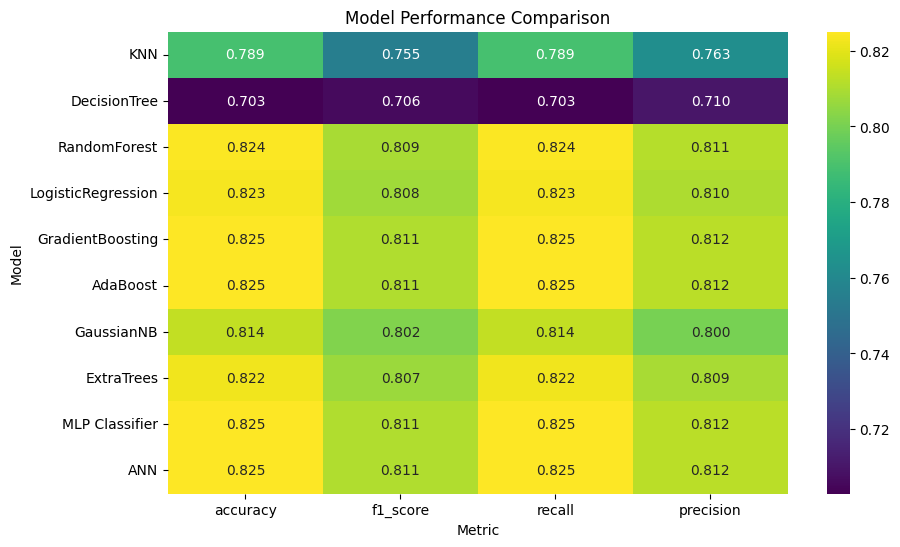

In [ ]:

plt.figure(figsize=(10, 6))
sns.heatmap(res_df.T, annot=True, cmap='viridis', fmt=".3f")
plt.title('Model Performance Comparison')
plt.xlabel('Metric')
plt.ylabel('Model')
plt.show()


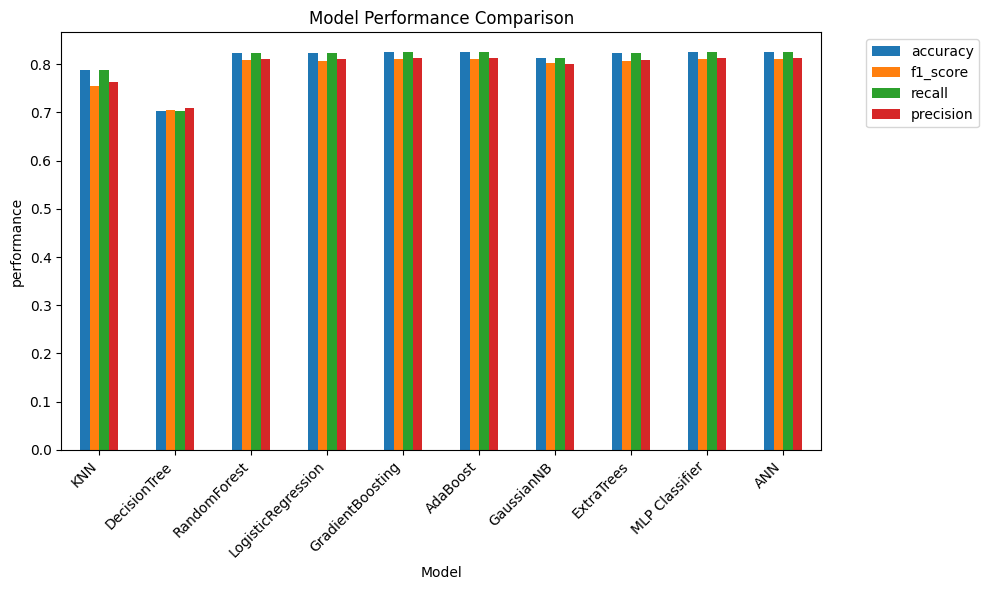

In [ ]:
ax = res_df.T.plot(kind='bar', figsize=(10, 6))
plt.title('Model Performance Comparison')
plt.xlabel('Model')
plt.ylabel('performance')
plt.xticks(rotation=45, ha='right')  # Rotate x-labels

# Create the legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()
